大多数情况下，两个分布的重叠的可能很小... sample出的数据很少...

从两个分布中sample出的数据，很可能重叠的几率很小，这时候使用最小化JS距离是不合适的，再训练时生成器也就无法进行更新，始终存在着距离..（因为只要两个分布没有重合，这个JS的距离是固定的，也就是在使用迭代优化时，梯度始终是0，也就无法进行参数的更新）

从另一个角度来理解，因GAN的训练类似于在train实现一个二分类问题，如果说两类分布分得很开，也就是说这两种的损失在不同的阶段（对应于JS的状态变化），始终是一样的，也就可能train不起来...（这是因为JS的特性）

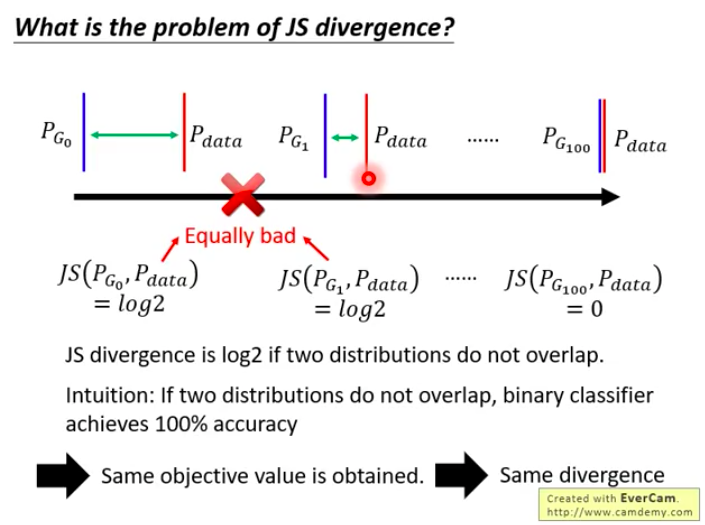

因为在使用sigmoid进行二分类的train时，在接近0或1的位置，也就是正例和负例的位置，更进一步说也就是判别器和生成器的训练，在0和1的附近是很难train的，因为都很平，梯度就接近0，也就说很容易陷进去... 为了解决这个问题，就将sigmoid替换成有定义域的线性函数，这就是LSGAN...（将分离替换成回归问题）

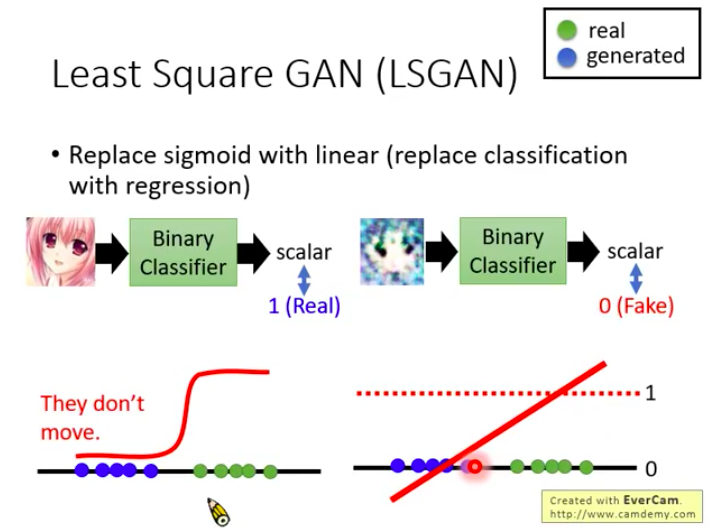

WGAN使用的是earth mover(wasserstein GAN)距离来替代JS等其它距离，这个earth mover是在两个分布之间，要将A分布移到B分布所要走的平均距离...

因达到这种要求的方法有很多种，那就穷举所有的方法，得到最好的那个...，如下：

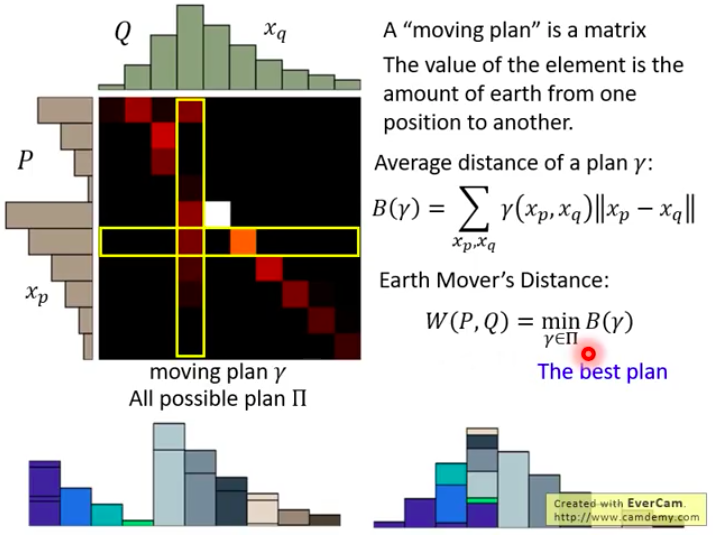

使用WEMD的距离就可以解决JS的问题... 每次生成器的变化都会影响wasserstein距离，而JS就不会...

WGAN要求判别器分布是1-拉普拉斯（不然函数就无法收敛） 1-拉普拉斯可以衡量函数的平滑性... 输入距离始终大于输出距离... 而这个条件限制，其实作用不大，还得结合使用权重阶段，才能work...

WGAN-GP（improved WGAN）

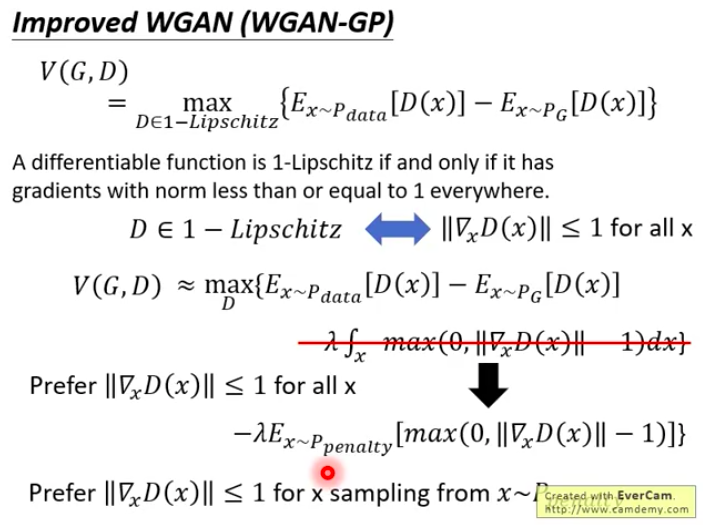

其实，使用的就是拉格朗日转换... 无法实现对所有的x求积分（生成器实际输入样本空间很大），所以就改为从Penalty中的数据求期望... Penalty的分布是两分布之间的分布，如下：

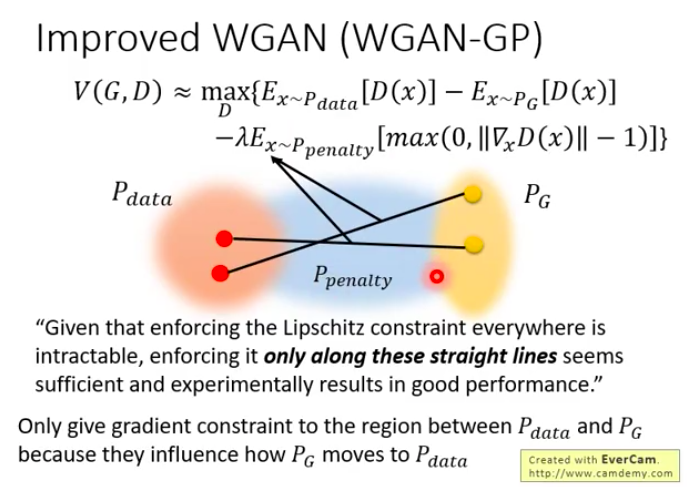
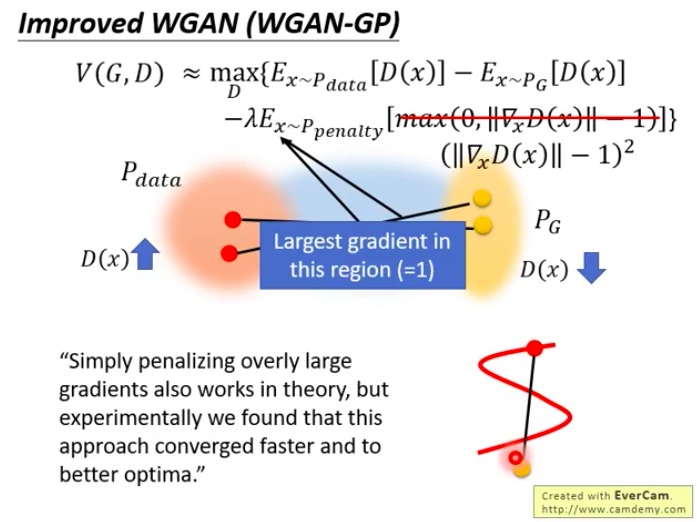

WGAN中的目标函数是没有使用sigmoid的，所以去掉log项，改用线性，同时加上weight clipping和gradient penalty技术...

WGAN的算法步骤：

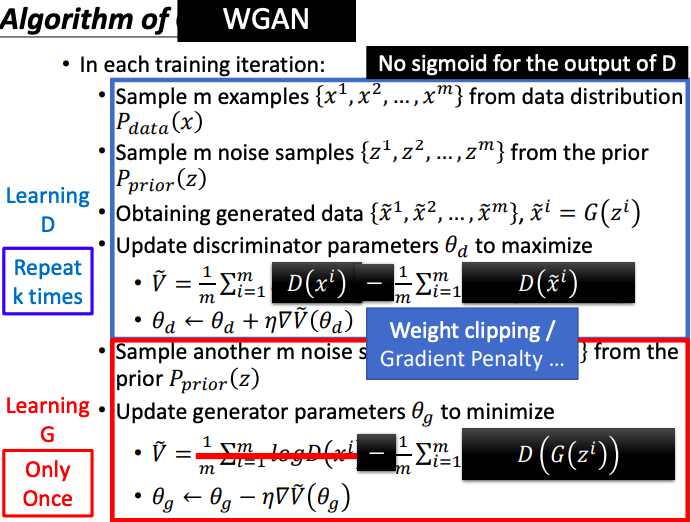

Spectrum Norm...

使得梯度norm是指小于1...

EBGAN...

生成器不变，判别器改为自编码器，如果是GAN的话，训练的时间会很长，使用自编码可以预训练，因为自编码只要有样本，就可以训练出一个好的模型，而不需要加入到实际的训练过程...

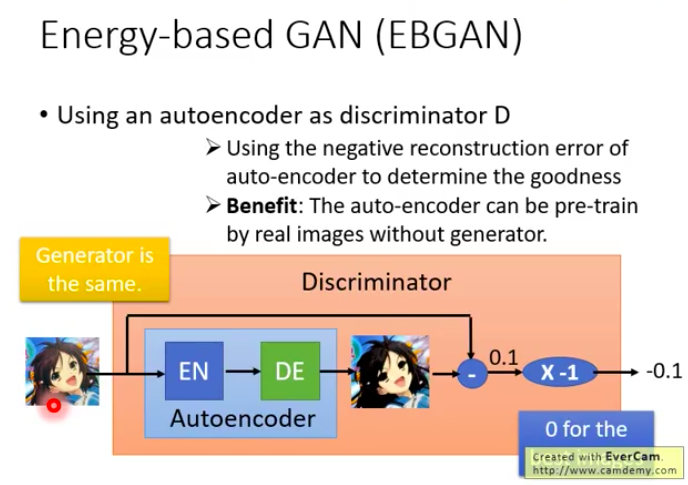

EBGAN不是要将生成器的loss越小越好，是有一个margin的人为设定的...

LSGAN...